# What are the most demanded skills for the top 3 most popular data roles?
### Methodology
1. Clean up skill count
2. Calculate skill count based on ```job_title_short```
3. Calculate skill percentage
4. Plot final findings

In [8]:
import pandas as pd
import seaborn as sns
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [9]:
job_country = 'United States'

df_country = df[df['job_country'] == job_country].copy()

In [13]:
df_skills = df_country.explode('job_skills').copy()

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

In [14]:
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending= False, inplace = True)

In [15]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [25]:
titles = df_skills_count['job_title_short'].unique().tolist()
titles = sorted(titles[:3])
titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

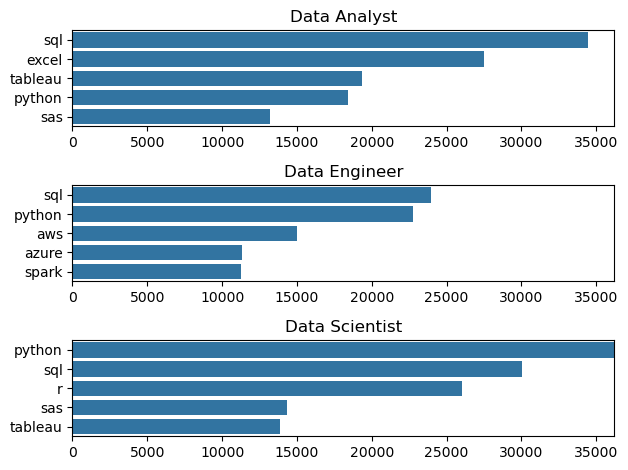

In [34]:
fig, ax = plt.subplots(len(titles), 1)

for i, title in enumerate(titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    sns.barplot(data = df_plot, x='skill_count', y='job_skills', ax=ax[i], legend=False)
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(ax[0].get_xlim())
plt.tight_layout()

In [37]:
df_job_title_count = df_country['job_title_short'].value_counts().reset_index(name='jobs_total')

In [40]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on = 'job_title_short')

df_skills_perc['skill_perc'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


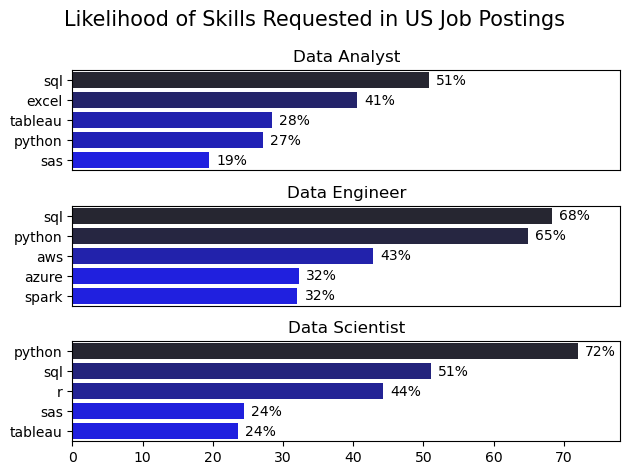

In [67]:
fig, ax = plt.subplots(len(titles), 1)

for i, title in enumerate(titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == title].head(5)
    sns.barplot(data = df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue = 'skill_count', legend=False, palette = 'dark:b_r')
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    if i != len(titles) - 1:
        ax[i].set_xticks([])
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize = 15)
plt.tight_layout()
